In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

gps_sensor_df = pd.read_csv('gps-sensor.csv')

In [2]:
#gps_sensor_df.dtypes

In [3]:
#gps_sensor_df.isna().sum()

In [4]:
gps_sensor_df.usertime.astype('datetime64[ns]')

0     2020-09-10 11:05:32
1     2020-09-10 11:05:33
2     2020-09-10 11:05:34
3     2020-09-10 11:05:35
4     2020-09-10 11:05:36
              ...        
206   2020-09-10 11:09:32
207   2020-09-10 11:09:33
208   2020-09-10 11:09:34
209   2020-09-10 11:09:35
210   2020-09-10 11:09:36
Name: usertime, Length: 211, dtype: datetime64[ns]

In [5]:
gps_sensor_df.shape

(211, 12)

In [6]:
gps_sensor_df

,usertime,timeseq,seq,x,y,z,pitch,yaw,roll,latitude,longitude,acc
0,11:05:32,110532,1,-0.018582,0.091512,0.049088,415.194118,-248.641176,-211.78235,37.323721,126.94901,3.23463
1,11:05:33,110533,2,0.016606,0.054831,0.055525,419.562500,-245.587500,-212.26875,37.323790,126.94914,3.84866
2,11:05:34,110534,3,-0.017494,0.033182,0.040106,421.894118,-242.705882,-211.61176,37.323817,126.94922,3.85716
3,11:05:35,110535,4,-0.031941,0.018635,-0.001529,423.282353,-241.594118,-213.41176,37.323862,126.94925,4.29394
4,11:05:36,110536,5,0.026500,-0.030656,-0.015781,423.156250,-242.368750,-213.37500,37.323868,126.94932,5.31398
...,...,...,...,...,...,...,...,...,...,...,...,...
206,11:09:32,110858,207,-0.007900,-0.048271,-0.027024,1004.623529,157.458824,-204.67059,37.324450,126.95037,5.49798
207,11:09:33,110859,208,0.001375,-0.134806,-0.070538,999.531250,154.812500,-204.66875,37.324459,126.95043,3.96112
208,11:09:34,110900,209,0.020482,-0.324994,-0.158994,986.564706,148.770588,-204.69412,37.324465,126.95048,2.16063
209,11:09:35,110901,210,-0.041418,-0.352012,-0.220076,965.635294,136.335294,-204.62941,37.324465,126.95048,0.00000


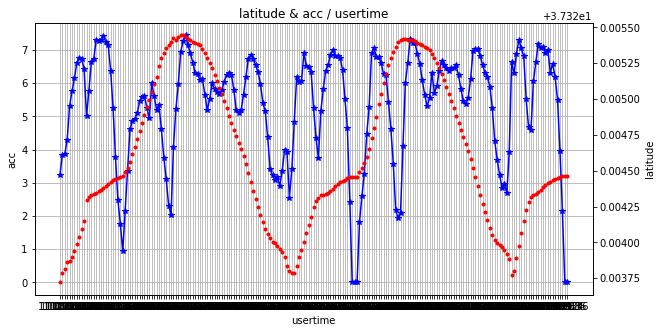

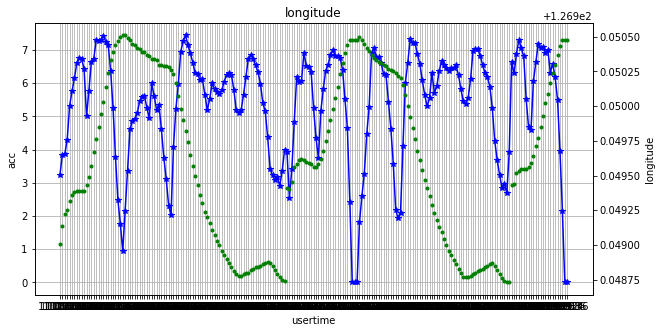

In [7]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(gps_sensor_df.usertime, gps_sensor_df.acc, 'b-*')
ax1.grid(True)
ax1.set_title("latitude & acc / usertime")
ax1.set_xlabel("usertime")
ax1.set_ylabel("acc")

ax2 = ax1.twinx()
ax2.set_ylabel("latitude")
ax2.plot(gps_sensor_df.usertime, gps_sensor_df.latitude, 'r .')

fig, ax3 = plt.subplots(figsize = (10, 5))

ax3.plot(gps_sensor_df.usertime, gps_sensor_df.acc, 'b-*')
ax3.grid(True)
ax3.set_title("longitude")
ax3.set_xlabel("usertime")
ax3.set_ylabel("acc")

ax4 = ax3.twinx()
ax4.set_ylabel("longitude")
ax4.plot(gps_sensor_df.usertime, gps_sensor_df.longitude, 'g .')

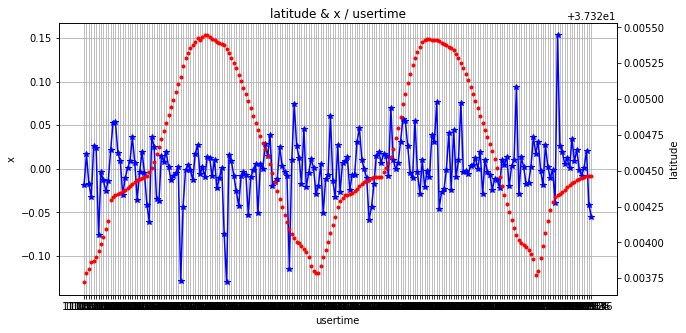

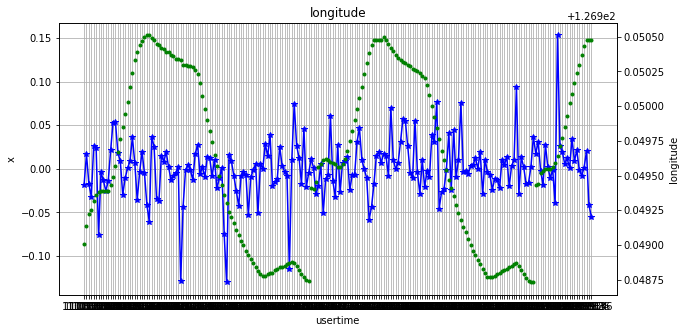

In [8]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(gps_sensor_df.usertime, gps_sensor_df.x, 'b-*')
ax1.grid(True)
ax1.set_title("latitude & x / usertime")
ax1.set_xlabel("usertime")
ax1.set_ylabel("x")

ax2 = ax1.twinx()
ax2.set_ylabel("latitude")
ax2.plot(gps_sensor_df.usertime, gps_sensor_df.latitude, 'r .')

fig, ax3 = plt.subplots(figsize = (10, 5))

ax3.plot(gps_sensor_df.usertime, gps_sensor_df.x, 'b-*')
ax3.grid(True)
ax3.set_title("longitude")
ax3.set_xlabel("usertime")
ax3.set_ylabel("x")

ax4 = ax3.twinx()
ax4.set_ylabel("longitude")
ax4.plot(gps_sensor_df.usertime, gps_sensor_df.longitude, 'g .')

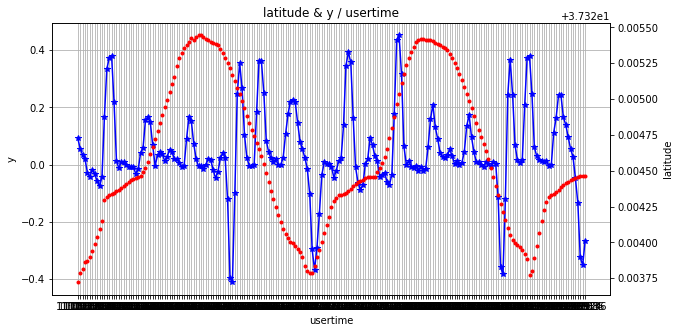

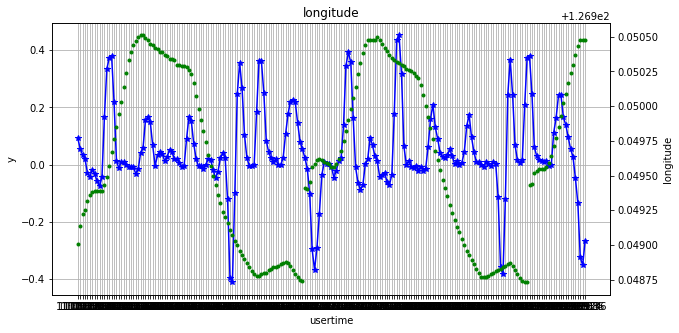

In [9]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(gps_sensor_df.usertime, gps_sensor_df.y, 'b-*')
ax1.grid(True)
ax1.set_title("latitude & y / usertime")
ax1.set_xlabel("usertime")
ax1.set_ylabel("y")

ax2 = ax1.twinx()
ax2.set_ylabel("latitude")
ax2.plot(gps_sensor_df.usertime, gps_sensor_df.latitude, 'r .')

fig, ax3 = plt.subplots(figsize = (10, 5))

ax3.plot(gps_sensor_df.usertime, gps_sensor_df.y, 'b-*')
ax3.grid(True)
ax3.set_title("longitude")
ax3.set_xlabel("usertime")
ax3.set_ylabel("y")

ax4 = ax3.twinx()
ax4.set_ylabel("longitude")
ax4.plot(gps_sensor_df.usertime, gps_sensor_df.longitude, 'g .')

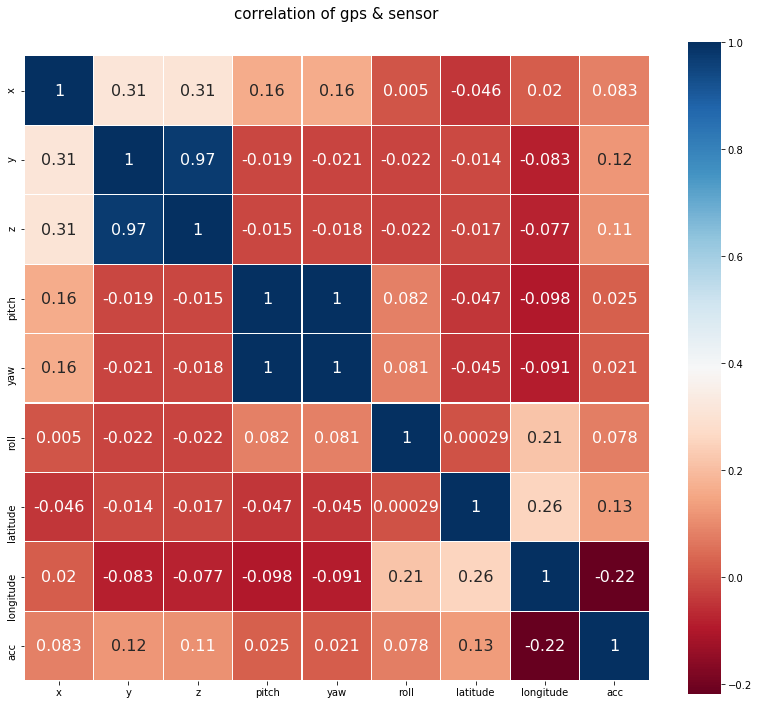

In [10]:
heatmap_data = gps_sensor_df[['x','y', 'z', 'pitch', 'yaw', 'roll', 'latitude', 'longitude', 'acc']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('correlation of gps & sensor', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size" : 16})

In [11]:
latitude_mean = gps_sensor_df.latitude.mean()
longitude_mean = gps_sensor_df.longitude.mean()

d = {'latitude' : [latitude_mean], 'longitude' : [longitude_mean]}

df_temp = pd.DataFrame(data = d)

gps_temp = gps_sensor_df[['latitude','longitude']].append(df_temp)

#gps_temp.shape
gps_array = gps_temp.values

gps_diff_array = np.diff(gps_array, axis=0)

sensor_array = gps_sensor_df[['x', 'y']].values

gps_sensor_arr = np.hstack([gps_diff_array, sensor_array])

name = ['latitude_g', 'longitude_g', 'x', 'y']

gps_sensor_g_df = pd.DataFrame(data=gps_sensor_arr, columns=name)

gps_sensor_g_df

,latitude_g,longitude_g,x,y
0,0.000069,0.000130,-0.018582,0.091512
1,0.000027,0.000080,0.016606,0.054831
2,0.000045,0.000030,-0.017494,0.033182
3,0.000006,0.000070,-0.031941,0.018635
4,0.000032,0.000040,0.026500,-0.030656
...,...,...,...,...
206,0.000009,0.000060,-0.007900,-0.048271
207,0.000006,0.000050,0.001375,-0.134806
208,0.000000,0.000000,0.020482,-0.324994
209,0.000000,0.000000,-0.041418,-0.352012


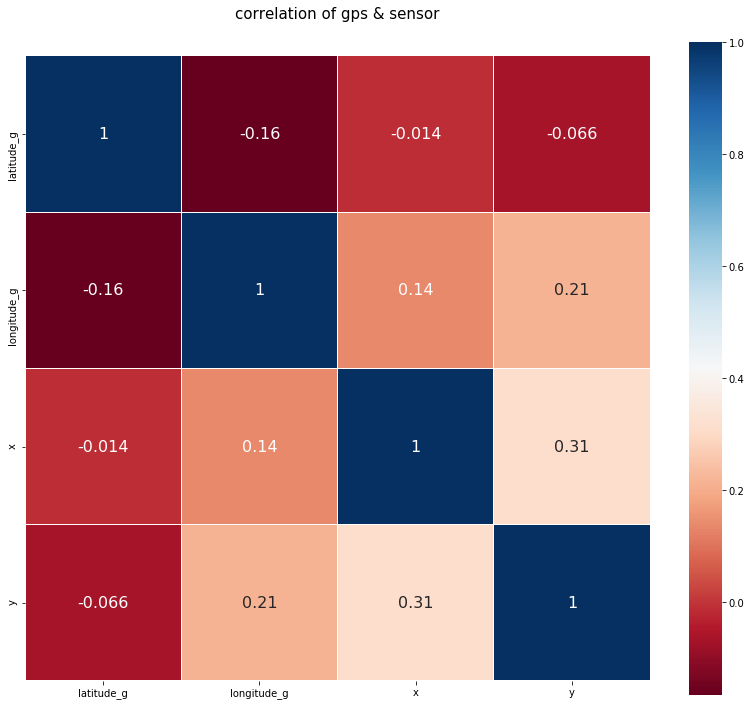

In [12]:
heatmap_data = gps_sensor_g_df

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('correlation of gps & sensor', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size" : 16})

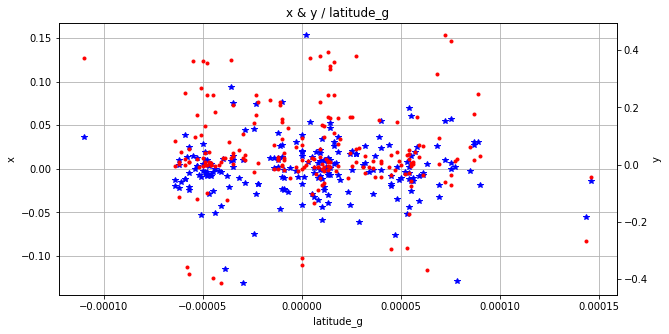

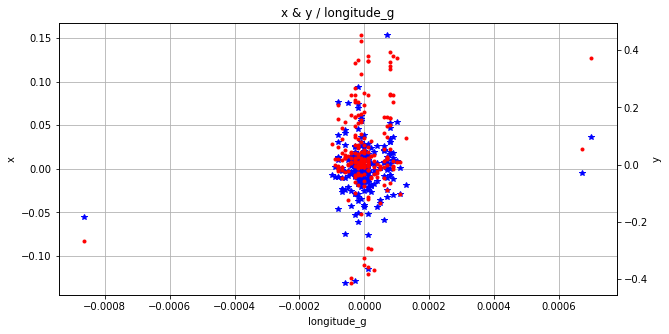

In [23]:
fig, ax1 = plt.subplots(figsize = (10, 5))

ax1.plot(gps_sensor_g_df.latitude_g, gps_sensor_g_df.x, 'b *')
ax1.grid(True)
ax1.set_title("x & y / latitude_g")
ax1.set_xlabel("latitude_g")
ax1.set_ylabel("x")

ax2 = ax1.twinx()
ax2.set_ylabel("y")
ax2.plot(gps_sensor_g_df.latitude_g, gps_sensor_g_df.y, 'r .')

fig, ax3 = plt.subplots(figsize = (10, 5))

ax3.plot(gps_sensor_g_df.longitude_g, gps_sensor_g_df.x, 'b *')
ax3.grid(True)
ax3.set_title("x & y / longitude_g")
ax3.set_xlabel("longitude_g")
ax3.set_ylabel("x")

ax4 = ax3.twinx()
ax4.set_ylabel("y")
ax4.plot(gps_sensor_g_df.longitude_g, gps_sensor_g_df.y, 'r .')

In [24]:
#def measurement_update(estimated_mean, estimated_var, measurement_mean, measurement_var):
#    new_mean = (measurement_var * estimated_mean + estimated_var * measurement_mean) / (estimated_var + measurement_var)
#    new_var = estimated_var * measurement_var / (estimated_var + measurement_var)
#    return new_mean, new_var

#def state_prediction(estimated_mean, estimated_var, motion_control_mean, motion_control_var):
#    new_mean = estimated_mean + motion_control_mean
#    new_var = estimated_var + motion_control_var
#    return new_mean, new_var

#measurements = gps_sensor_df.latitude
#measurement_var = gps_sensor_df.latitude.mean();
    
#motion_control = gps_sensor_df.x
#motion_control_var= gps_sensor_df.x.mean();
    
#mu = 0;
#sig = 1000;
    
#for i in range(len(measurements)):
#    mu, sig = measurement_update(mu, sig, measurements[i], measurement_var)
#    print("update : [%f %f]" % (mu, sig))
#    mu, sig = state_prediction(mu, sig, motion_control[i], motion_control_var)
#    print("predict : [%f %f]" % (mu, sig))


In [26]:
measurements = gps_sensor_df[['latitude', 'longitude']].values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

measurements_scaled = scaler.fit_transform(measurements)

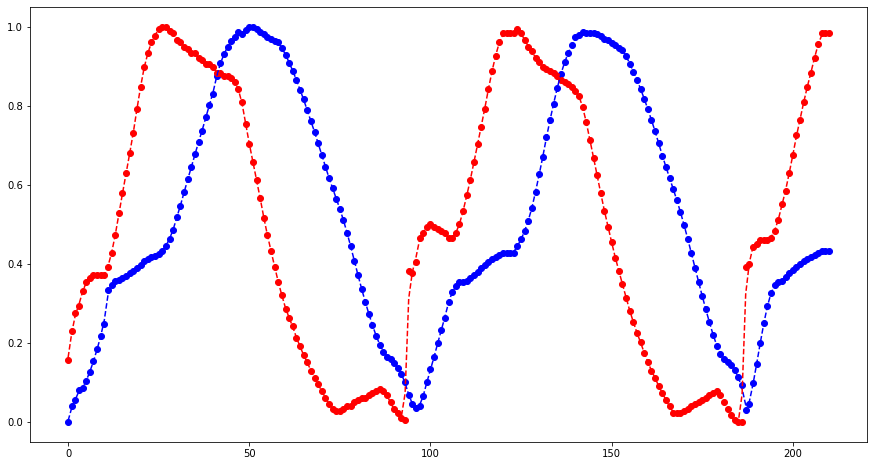

In [30]:
from pykalman import KalmanFilter
import time

initial_state_mean = [measurements_scaled[0, 0],
                      0,
                      measurements_scaled[0, 1],
                      0]

transition_matrix = [[1, 1, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 0],
                      [0, 0, 1, 0]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean)

kf1 = kf1.em(measurements_scaled, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements_scaled)

plt.figure(1, figsize=(15,8))
times = range(measurements_scaled.shape[0])
plt.plot(times, measurements_scaled[:, 0], 'bo',
         times, measurements_scaled[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()

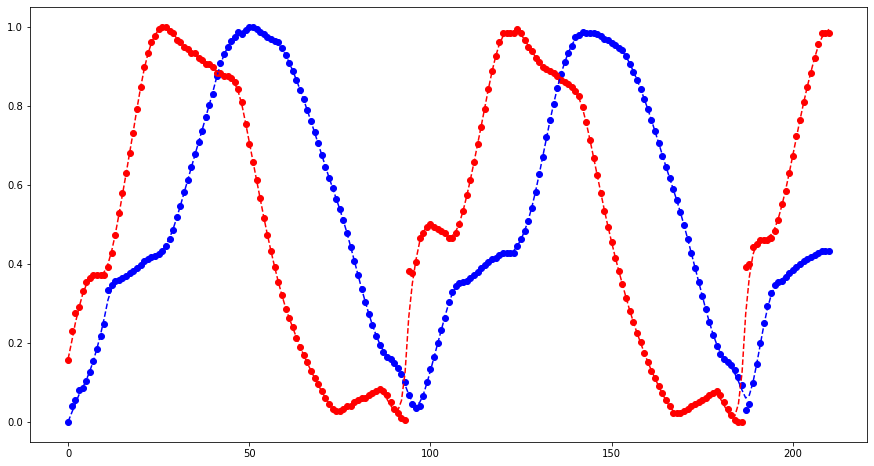

In [31]:
kf2 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean,
                  observation_covariance = 10*kf1.observation_covariance,
                  em_vars=['transition_covariance', 'initial_state_covariance'])

kf2 = kf2.em(measurements_scaled, n_iter=5)
(smoothed_state_means, smoothed_state_covariances)  = kf2.smooth(measurements_scaled)

plt.figure(2, figsize=(15,8))
times = range(measurements_scaled.shape[0])
plt.plot(times, measurements_scaled[:, 0], 'bo',
         times, measurements_scaled[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()